Notebook with the code to calculate the fragmentation of the intermetallic particles individually


In [55]:
# Load packages

# For function declarations
import IMCFunctions as fct
import importlib
importlib.reload(fct)

# For data management
import numpy as np
import pandas as pd
import xarray as xr
import h5py
import pickle

# For image analysis 

import skimage as sk
from skimage.measure import label, regionprops, find_contours,  perimeter
from skimage.draw import polygon_perimeter
from scipy.spatial.distance import cdist
import scipy
from skimage import draw
from scipy.spatial import ConvexHull
from skimage import measure, morphology


# for visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines

import seaborn as sns
import matplotlib.colors as mcolors
from PIL import Image


# for math
import math
import random
import re






In [ ]:
properties = fct.read_from_pickle("Particle_properties_AH0676_3")


segmentation_AH0676_3 = "/home/zoe/Documents/EPFL/PDM/SegmentationData/AsHomogenized0676/AH_0676_3/AH0676_Segmentation3.h5" 
segmentation_AH0676_3= fct.import_segmentation_data_h5(segmentation_AH0676_3)

properties = fct.identify_particle_properties(segmentation_AH0676_3, 22)

area = fct.get_area(segmentation_AH0676_3, 22)


print(properties)

Xarray object loaded from pickles/Particle_properties_AH0676_3
<xarray.DataArray (particles: 114, properties: 19)> Size: 17kB
array([[1.62425684e+02, 3.71586207e+02, 2.75353466e+01, ...,
        4.37114405e-01, 1.00000000e+00, 7.31028994e+01],
       [8.89892985e+00, 9.20332937e+00, 4.66151519e+00, ...,
        9.66925065e-01, 2.00000000e+00, 1.44495849e+01],
       [9.75029727e-01, 1.09869203e+00, 1.54995952e+00, ...,
        8.87445887e-01, 2.00000000e+00, 6.72950625e+01],
       ...,
       [6.56837099e+00, 8.97502973e+00, 1.05185009e+01, ...,
        7.31849497e-01, 2.00000000e+00, 7.80780702e+01],
       [1.61712247e-01, 1.61712247e-01, 5.09832511e-01, ...,
        1.00000000e+00, 2.00000000e+00, 2.80681547e+01],
       [1.07586207e+01, 1.25802616e+01, 9.10359819e+00, ...,
        8.55198488e-01, 2.00000000e+00, 4.18442479e+01]])
Coordinates:
  * particles   (particles) int64 912B 0 1 2 3 4 5 6 ... 108 109 110 111 112 113
  * properties  (properties) object 152B 'area' ... 'orient

In [32]:
area_AA6014_center_step15, properties_AA6014_center_step15  = fct.read_from_pickle("properties_AA6014_center_step15")
area_AA6014_center_step16, properties_AA6014_center_step16  = fct.read_from_pickle("properties_AA6014_center_step16")

Xarray object loaded from pickles/properties_AA6014_center_step15
Xarray object loaded from pickles/properties_AA6014_center_step16


In [33]:

file_list = [
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-15_20rpm/E23849_N-15.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-14_45rpm/E23849_N-14.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-13_45rpm/E23849_N-13.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-12_45rpm/E23849_N-12.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-11_45rpm/E23849_N-11.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-10_45rpm/E23849_N-10.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-9_45rpm/E23849_N-9.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-8_45rpm/E23849_N-8.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-7_45rpm/E23849_N-7.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-6_45rpm/E23849_N-6.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-5_45rpm/E23849_N-5.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-4_45rpm/E23849_N-4.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-3_45rpm/E23849_N-3.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-2_10rpm/E23849_N-2.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N-1_55rpm/E23849_N-1.xlsx",
    "/home/zoe/Documents/EPFL/PDM/0676_Rolling_simulation/e170RC_fullhotrollschedule_SP9160-11_E23849/E23849_N_90rpm/E23849_N.xlsx"
]



list_strains = fct.get_strain_list_center(file_list)
list_strains_edge = fct. get_strain_list_edge(file_list)


print(list_strains)
print(len(list_strains))


print(list_strains_edge)
print(len(list_strains_edge))

[0.05809204300020777, 0.060782565178068015, 0.061220222167086225, 0.12715897982461857, 0.14194752781596645, 0.1604265649963897, 0.10137152117593758, 0.202488223656142, 0.2449337499911786, 0.3104171210379421, 0.42842262985352225, 0.4387137488155371, 0.48637974864405925, 0.18319346397307065, 1.0475332159601232, 0.8461593194379728]
16
[0.09893431718588981, 0.09409225517160455, 0.09424008430167026, 0.14692231240850223, 0.1579990239846345, 0.1734260332623826, 0.11230484372715538, 0.20231028190709752, 0.24434930739297792, 0.3113929155034575, 0.43680365954831457, 0.45619349804097603, 0.5080152873886402, 0.18315401612854465, 1.1030218796144808, 0.8932650021765967]
16


In [89]:
## Import all the possible input data 

input_AH0676_2 = fct.read_from_pickle("Particle_properties_AH0676_2")

print(input_AH0676_2)


Xarray object loaded from pickles/Particle_properties_AH0676_2
<xarray.DataArray (particles: 320, properties: 19)> Size: 49kB
array([[2.02045184e+02, 3.16637337e+02, 5.21397013e+01, ...,
        6.38096526e-01, 2.00000000e+00, 6.74455907e+01],
       [2.85374554e-02, 3.32936980e-02, 3.71856579e-01, ...,
        8.57142857e-01, 2.00000000e+00, 8.52688389e+01],
       [2.85374554e-02, 2.85374554e-02, 2.25240436e-01, ...,
        1.00000000e+00, 2.00000000e+00, 0.00000000e+00],
       ...,
       [4.16171225e+00, 4.54221165e+00, 3.88744646e+00, ...,
        9.16230366e-01, 2.00000000e+00, 3.57783751e+01],
       [1.36979786e+00, 1.46967895e+00, 1.76267879e+00, ...,
        9.32038835e-01, 2.00000000e+00, 4.70159129e+00],
       [6.51605232e-01, 7.51486326e-01, 1.41091432e+00, ...,
        8.67088608e-01, 2.00000000e+00, 2.72198421e+00]])
Coordinates:
  * particles   (particles) int64 3kB 0 1 2 3 4 5 6 ... 314 315 316 317 318 319
  * properties  (properties) object 152B 'area' ... 'orienta

In [90]:


segmentation_AH0676_2 = "Segmented_Images/AH0676_Segmentation3.h5" 
segmentation_AH0676_2= fct.import_segmentation_data_h5(segmentation_AH0676_2)
area_AH0676_2 = fct.get_area(segmentation_AH0676_3, 22)


# print(segmentation_AH0676_3)
# input_AH0676_3, labeled_image = fct.identify_particle_properties(segmentation_AH0676_3, 22)

# print(input_AH0676_3)

In [75]:
print(area_AH0676_1)


233979.76859504133


In [42]:
exp_data_step15 = fct.read_from_pickle("combined_properties_18_5_center_redo")
exp_data_step16 = fct.read_from_pickle("combined_properties_9_5_center_redo")

exp_area_step15 =  797777.3049974095
exp_area_step16 =  800789.5270144404

Xarray object loaded from pickles/combined_properties_18_5_center_redo
Xarray object loaded from pickles/combined_properties_9_5_center_redo


In [91]:
output_multirun_data_edge, output_multirun_probas_edge = fct.multirun_full_code_probabreak(input_AH0676_2, 16, 2, 0.1, list_strains_edge,10, weibull_modulus=0.556, reference_ecd=6.9608, reference_stress=17.6373, return_intermediate=True)

data shape start of step 0 (310, 19)
number of runs through probability break 0
data shape start of step 1 (360, 6)
number of runs through probability break 1
data shape start of step 2 (408, 6)
number of runs through probability break 2
data shape start of step 3 (447, 6)
number of runs through probability break 3
data shape start of step 4 (493, 6)
number of runs through probability break 4
data shape start of step 5 (532, 6)
number of runs through probability break 5
data shape start of step 6 (585, 6)
number of runs through probability break 6
data shape start of step 7 (616, 6)
number of runs through probability break 7
data shape start of step 8 (655, 6)
number of runs through probability break 8
data shape start of step 9 (692, 6)
number of runs through probability break 9
data shape start of step 10 (749, 6)
number of runs through probability break 10
data shape start of step 11 (793, 6)
number of runs through probability break 11
data shape start of step 12 (851, 6)
number of 

Simulated data (property: orientation_deg):
  Average: 10.3778
  Standard Deviation: 5.3601
  Total Number Density: 0


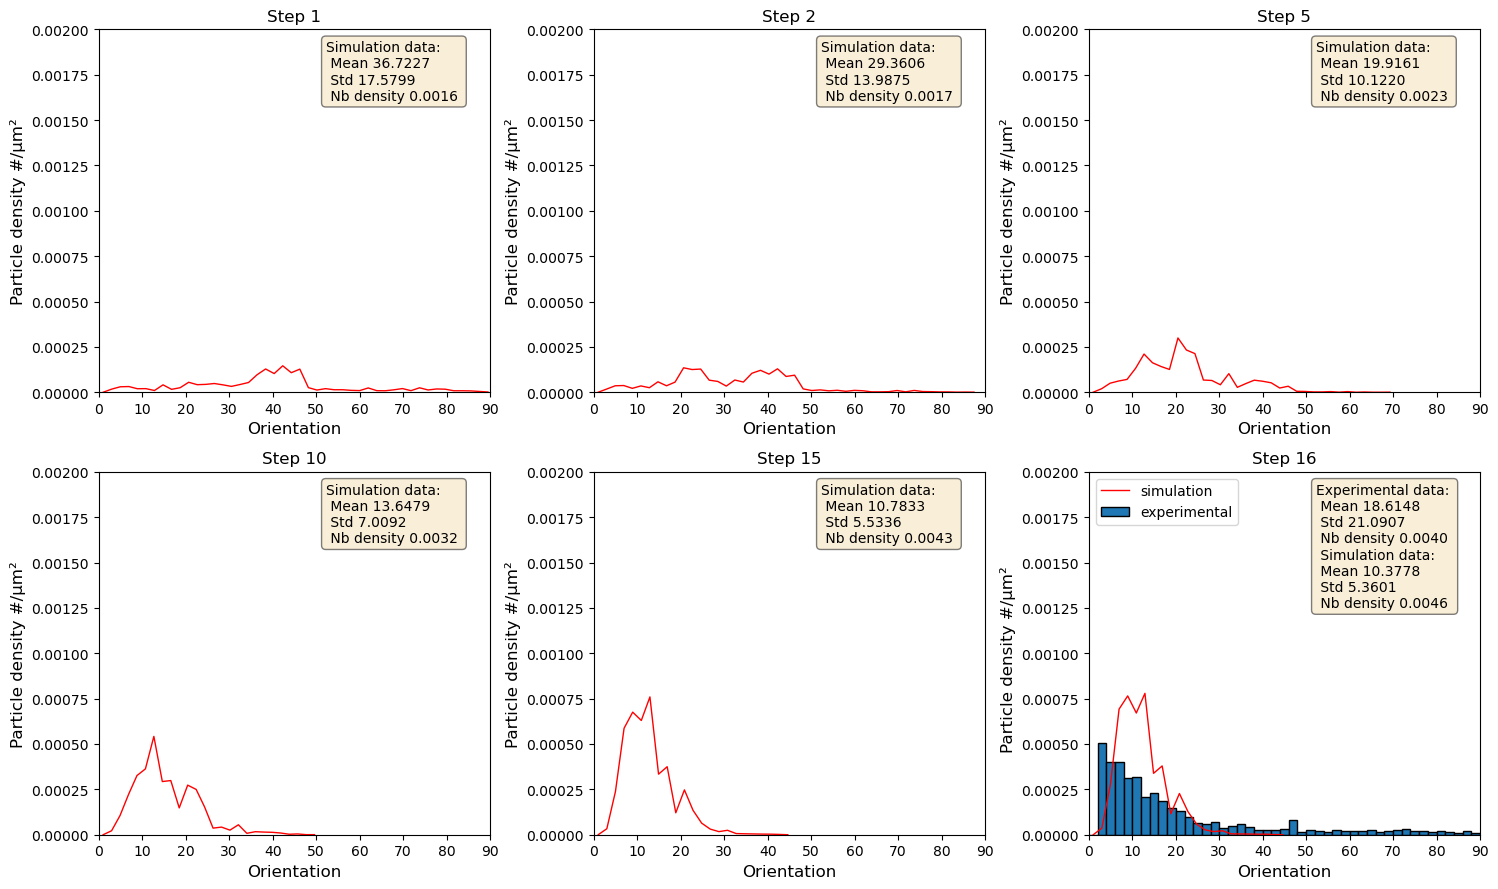

Simulated data (property: ECD):
  Average: 1.2856
  Standard Deviation: 0.8667
  Total Number Density: 0


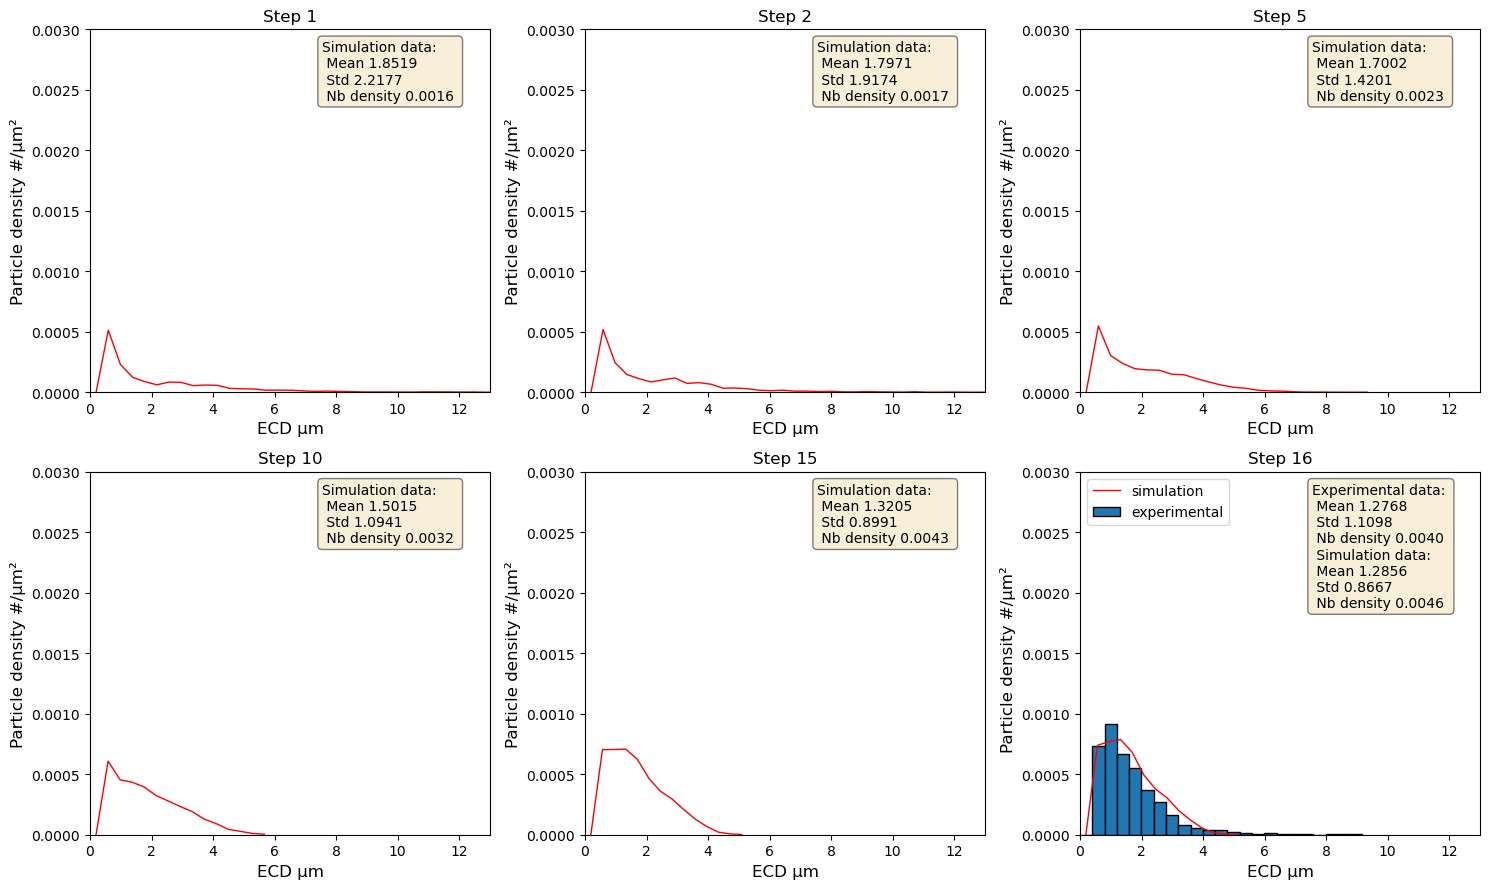

Simulated data (property: smallest_dim_area):
  Average: 1.4251
  Standard Deviation: 1.3053
  Total Number Density: 0


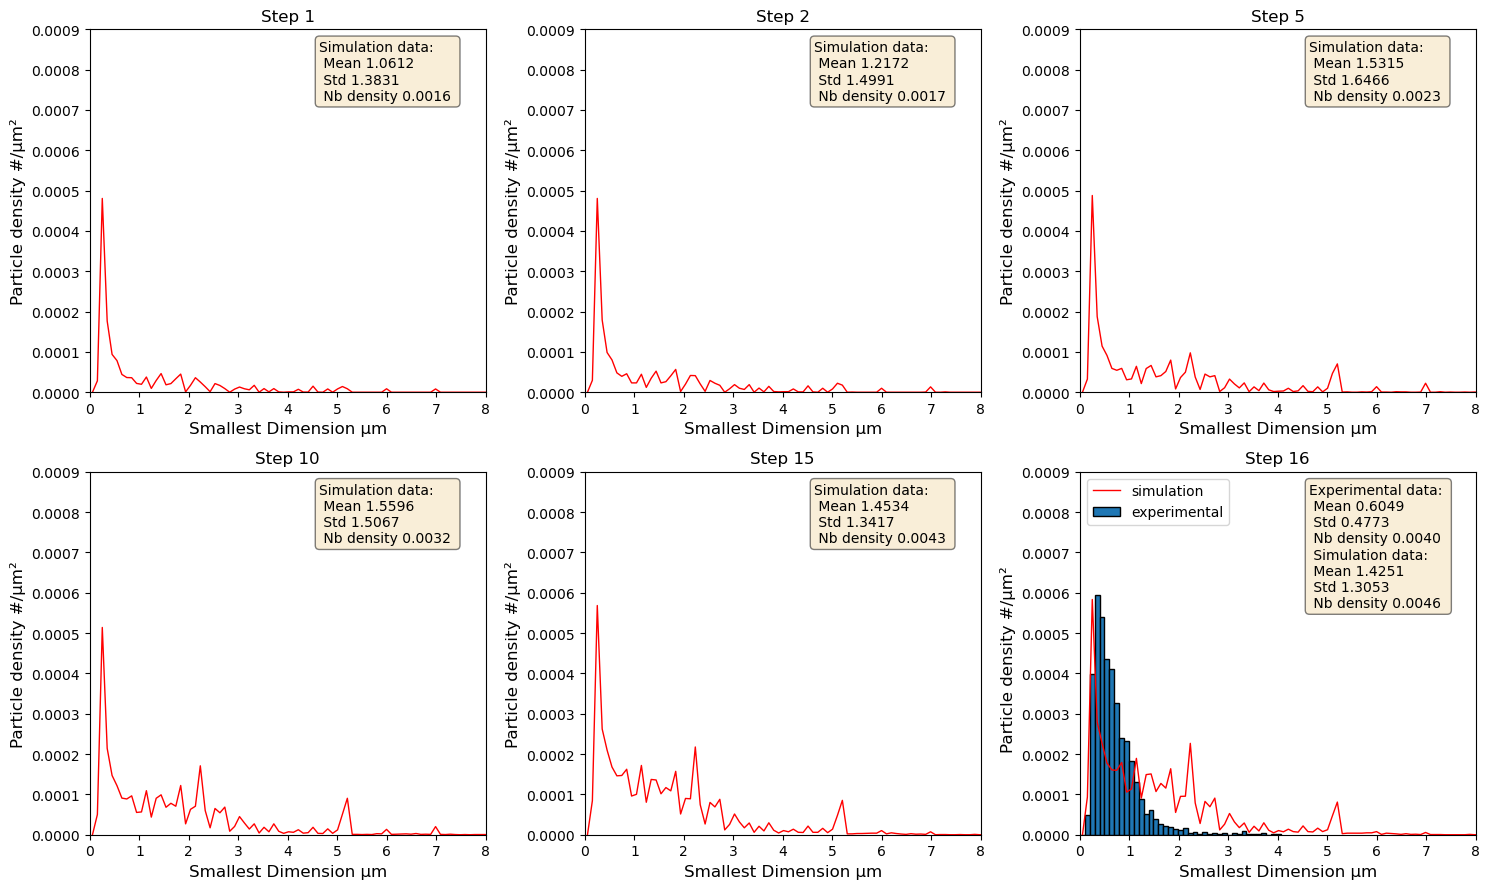

Simulated data (property: largest_dimension):
  Average: 3.8172
  Standard Deviation: 2.9427
  Total Number Density: 0


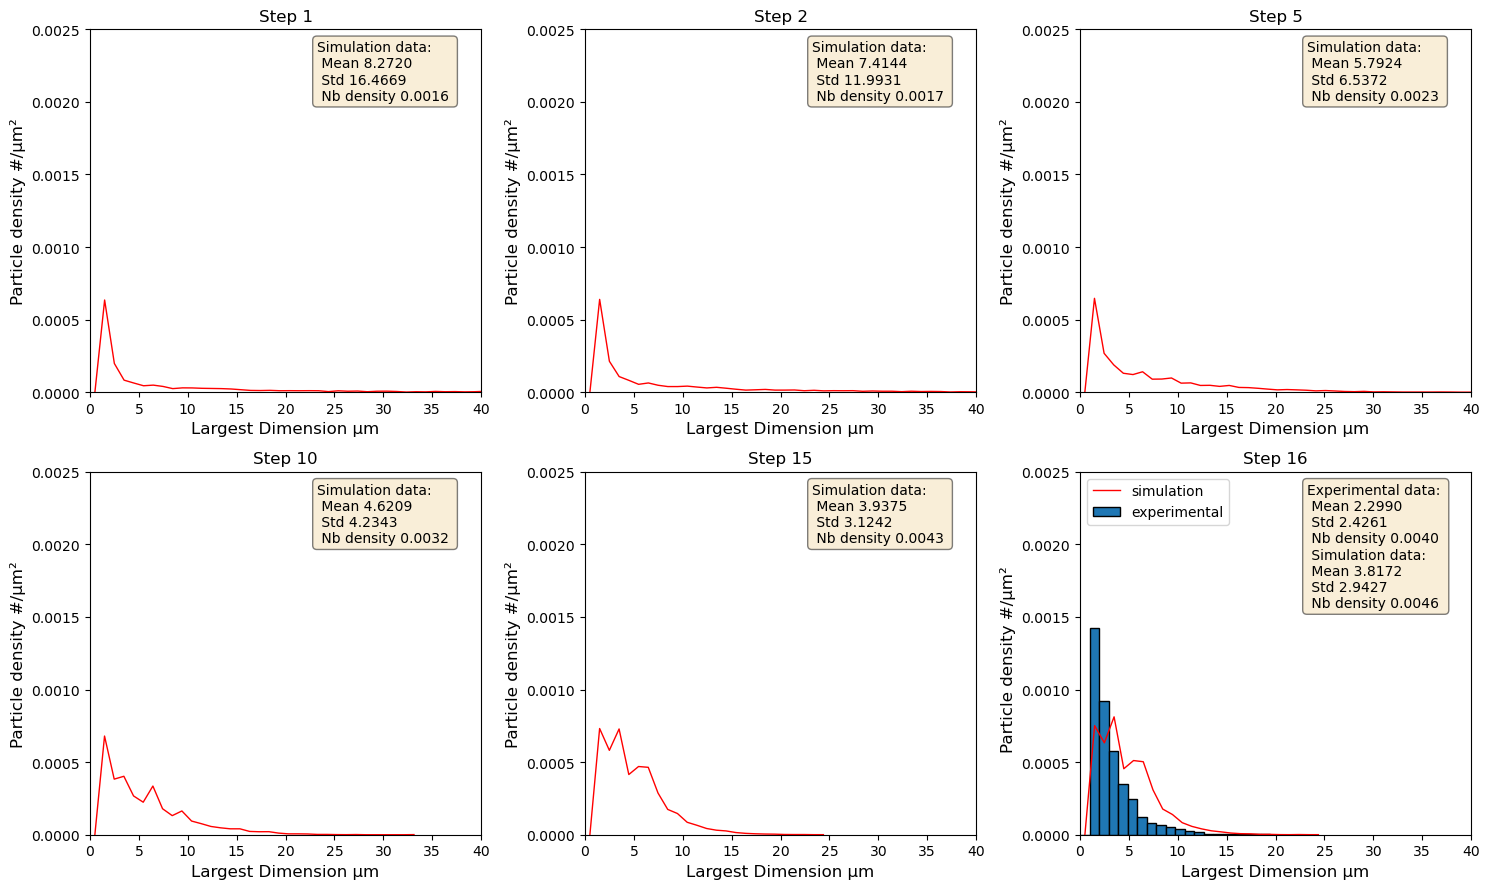

Simulated data (property: area):
  Average: 7.3163
  Standard Deviation: 9.2508
  Total Number Density: 0


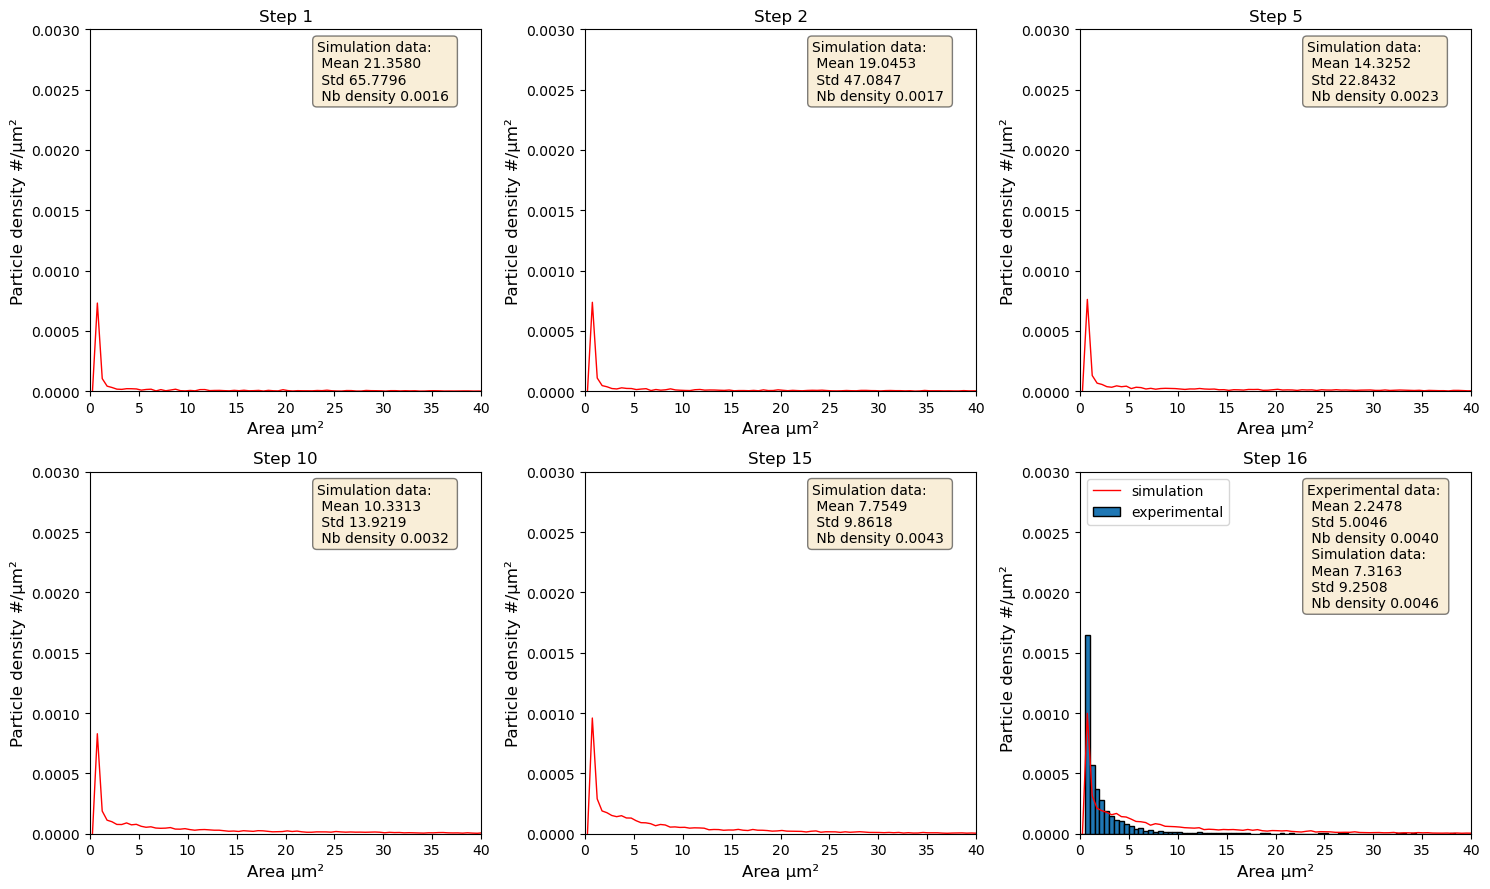

Simulated data (property: Aspect Ratio):
  Average: 4.2200
  Standard Deviation: 5.6768
  Total Number Density: 0


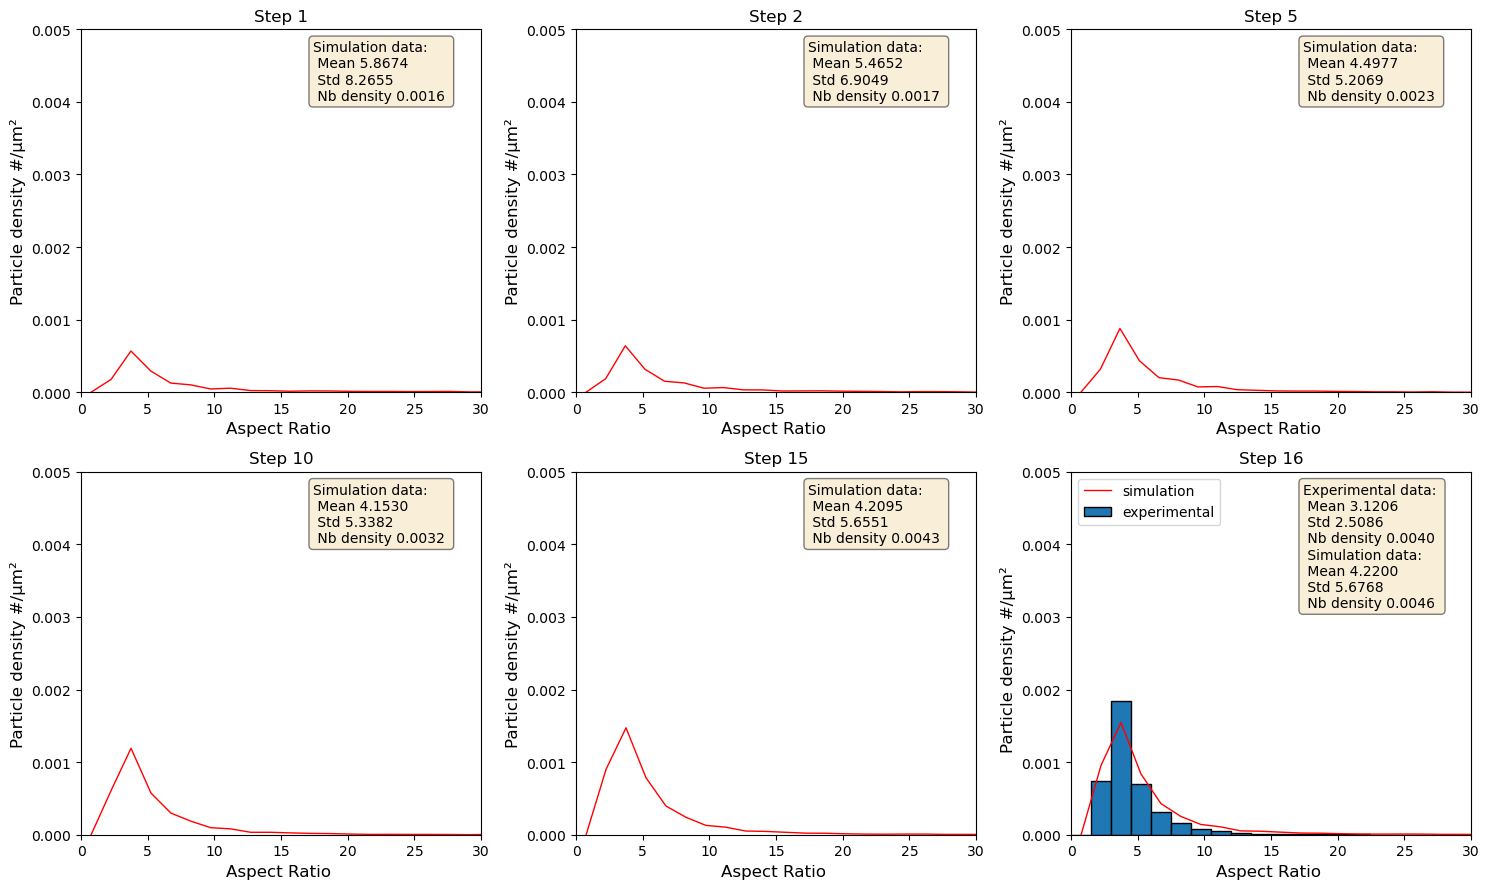

In [92]:
sim_area = area_AH0676_2 * 10

fct.multiplot_V2(output_multirun_data_edge, sim_area, exp_data_step16, exp_area_step16, "orientation_deg", "Orientation", "Orientation averaged over 10 runs center")

fct.multiplot_V2(output_multirun_data_edge, sim_area, exp_data_step16, exp_area_step16, "ECD", "ECD μm", "ECD averaged over 10 runs center")

fct.multiplot_V2(output_multirun_data_edge, sim_area, exp_data_step16, exp_area_step16, "smallest_dim_area", "Smallest Dimension μm", "Smallest Dimension averaged over 10 runs center")

fct.multiplot_V2(output_multirun_data_edge, sim_area, exp_data_step16, exp_area_step16, "largest_dimension", "Largest Dimension μm", "Largest Dimension averaged over 10 runs center")

fct.multiplot_V2(output_multirun_data_edge, sim_area, exp_data_step16, exp_area_step16, "area", "Area μm²", "Area averaged over 10 runs center")

fct.multiplot_V2(output_multirun_data_edge, sim_area, exp_data_step16, exp_area_step16, "Aspect Ratio", "Aspect Ratio ", "Aspect Ratio averaged over 10 runs center")